**Capsule Counter** is a Python-based image processing tool designed to simplify medication management for elderly patients. By analyzing images of medicine tablets, the tool automatically identifies and counts the remaining capsules, providing doctors and caregivers with accurate information on medication usage.

The user-friendly interface allows for easy image uploads and clear visualization of results, making it a valuable asset in ensuring medication adherence and improving patient care.

**Team Responsibilities:**
*   Mehmet Akif VARDAR - Responsible for developing the image processing algorithm.
*   Burhan ÇALIK - Responsible for UI development.
*   Gökhan Cafer KILIÇARSLAN - Bug fixing, functionality programming & research.


**References:**
*   chatgpt.com
*   gemini.google.com
*   Github Copilot
*   DepositPhotos.com - Medicine Images
*   Ali, M. H. (2023). Real-time objects detection, tracking, and counting using image processing techniques. Al-Nahrain Journal for Engineering Sciences, 26(1), 24-30.
*   Zhang, Y., Zhou, D., Chen, S., Gao, S., & Ma, Y. (2016). Single-image crowd counting via multi-column convolutional neural network. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 589-597.
*   A Comprehensive Review of Medical Image Analysis Methods

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [33]:
def preprocess_image(img):
    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Extract the saturation channel
    saturation = hsv[:,:,1]

    # Apply Otsu's thresholding to the saturation channel
    _, mask_colored = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculate the median of the grayscale image
    v = np.median(gray)

    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - 0.33) * v))
    upper = int(min(255, (1.0 + 0.33) * v))
    edges = cv2.Canny(gray, lower, upper)

    # Combine the color and edge masks
    mask = cv2.bitwise_or(mask_colored, edges)

    return mask

In [34]:
def morphological_operations(mask):
    # Define the kernel size
    kernel_size = 5  # Smaller than before

    # Create the kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform morphological opening
    morphed = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)

    # Perform morphological closing
    morphed = cv2.morphologyEx(morphed, cv2.MORPH_CLOSE, kernel, iterations=2)

    return morphed

In [35]:
def find_and_filter_contours(img, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"Found {len(contours)} contours.")

    # Calculate the area threshold as a percentage of the total image area
    area_threshold = 0.01 * img.shape[0] * img.shape[1]  # 1% of the total image area

    print("Calculated area threshold: " + str(area_threshold))

    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > area_threshold:  # Filter by area
            filtered_contours.append(contour)

    print(f"Filtered to {len(filtered_contours)} contours.")
    return filtered_contours


In [36]:
def draw_contours(img, contours):
    img_with_contours = img.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_with_contours, (x, y), (x + w, y + h), (0, 0, 255), 2)
    return img_with_contours

In [37]:
# Read the image
img = cv2.imread('ilac4.jpg')

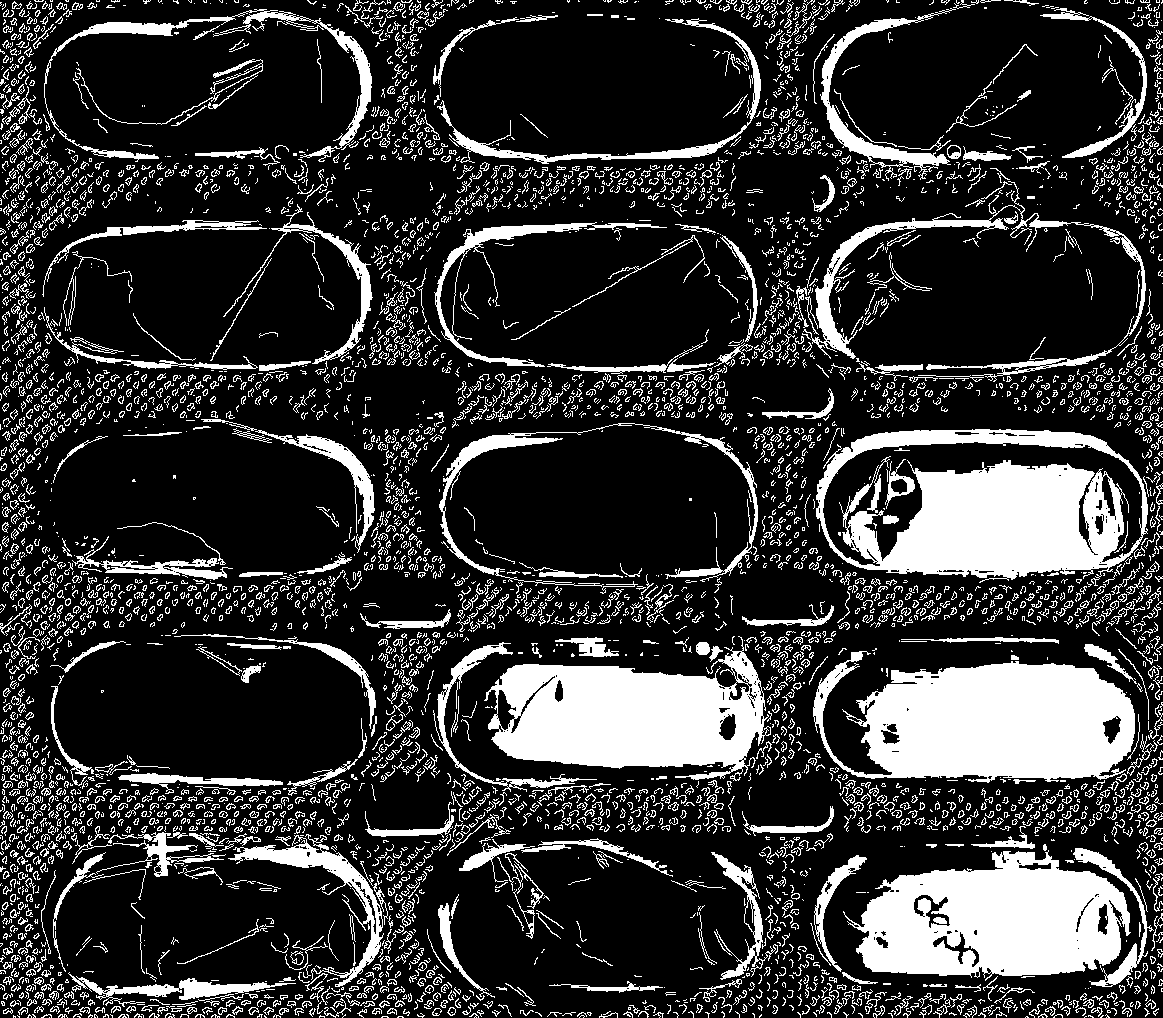

In [38]:
# Preprocess the image to create a mask.
mask = preprocess_image(img)
cv2_imshow(mask)

In [39]:
# Perform morphological operations
morphed = morphological_operations(mask)

In [40]:
# Find and filter contours
filtered_contours = find_and_filter_contours(img, morphed)

Found 42 contours.
Calculated area threshold: 11839.34
Filtered to 4 contours.


In [41]:
# Draw contours and bounding boxes
img_with_contours = draw_contours(img, filtered_contours)

In [42]:
# Count capsules
num_capsules = len(filtered_contours)
print(f"Detected {num_capsules} capsules in the image.")

Detected 4 capsules in the image.


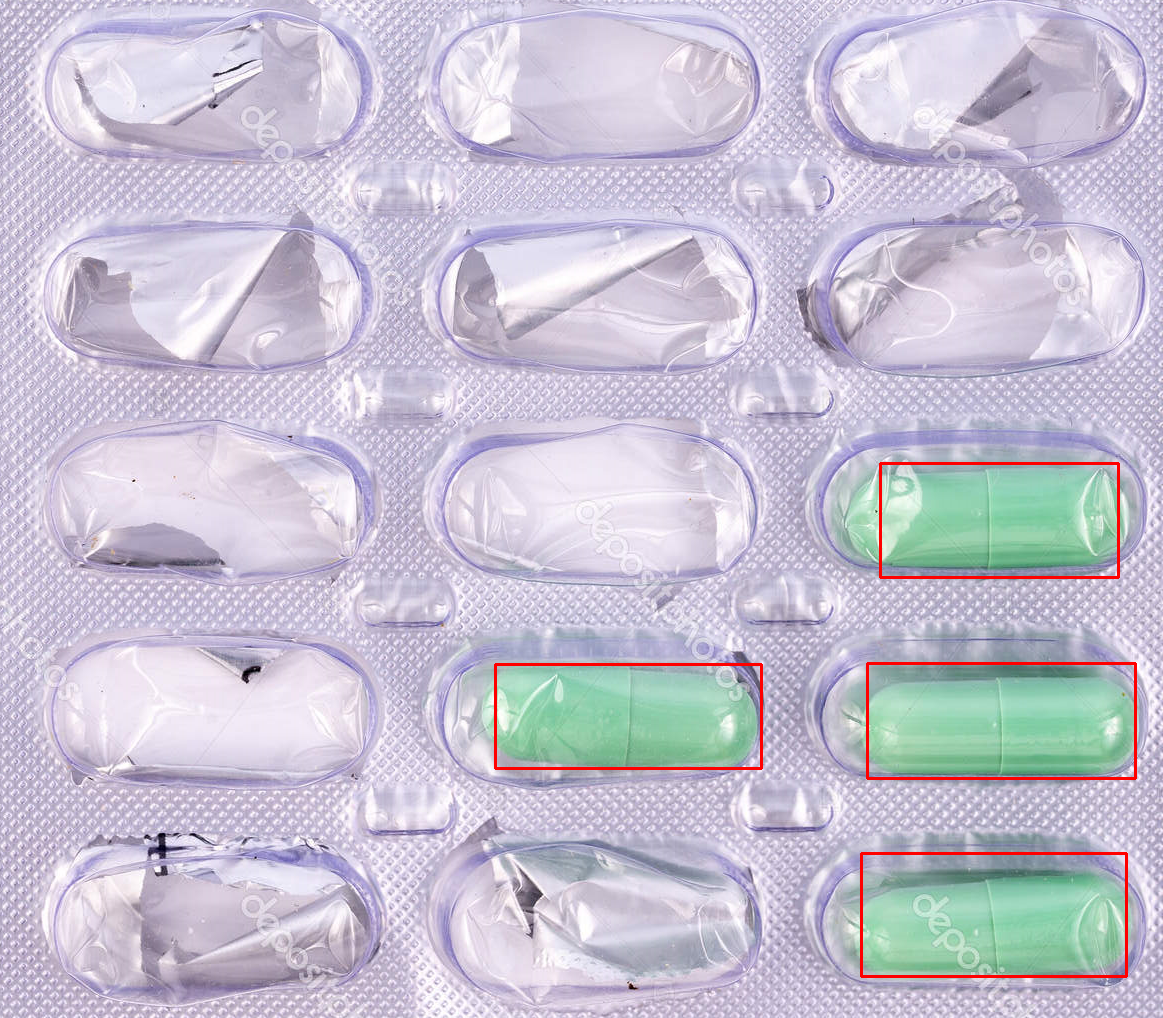

In [43]:
# Display the result
cv2_imshow(img_with_contours)